Matplotlib 버전 1.3부터는 삼각 그리드(triangular grid)에 대한 지원이 추가되었다. 삼각 그리드를 사용하연 기존의 사각형 영역 뿐 아니라 임의의 영역에 대해서 컨투어 플롯이나 서피스 플롯을 그릴 수 있으므로 정의역(domain)이 직사각형이 아닌 2차원 함수도 시각화 할 수 있다.

### 패키지
삼각 그리드 지원을 위한 코드 중 일부는 tri 서브 패키지 아래에 있으므로 미리 임포트한다.

In [1]:
import matplotlib.tri as mtri

### 삼각 그리드 클래스
삼각 그리드 지원을 위한 클래스는 다음과 같다.

+ 삼각 그리드 생성
    * Triangulation    
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.Triangulation

+ 삼각 그리드 세분화
    * TriRefiner
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.TriRefiner

    * UniformTriRefiner
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.UniformTriRefiner

+ 삼각 그리드 플롯
    * triplot
    http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.triplot
    * tricontour
    http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tricontour
    * tricontourf
    http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tricontourf
    * tripcolor
    http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.tripcolor

+ 삼각 그리드 보간
    * TriInterpolator
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.TriInterpolator
    * LinearTriInterpolator
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.LinearTriInterpolator
    * CubicTriInterpolator
    http://matplotlib.org/api/tri_api.html?highlight=triangulation#matplotlib.tri.CubicTriInterpolator

### 삼각 그리드 생성
삼각 그리드는 Triangulation 클래스로 생성한다. Triangulation 클래스는 x. y, triangles 세 개의 인수를 받는데 x, y는 일련의 점들의 x좌표와 y좌표를 나타내는 1차원 벡터들이고 triangles는 이 점들에 대한 기하학적 위상 정보 즉, 어떤 삼각형이 있으며 각 삼각형이 어떤 점들로 이루어져있는가를 본다. 만약 triangles가 주어지지 않으면 자동으로 생성한다.

In [4]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = "NanumGothicOTF"
plt.rcParams['font.size'] = 12

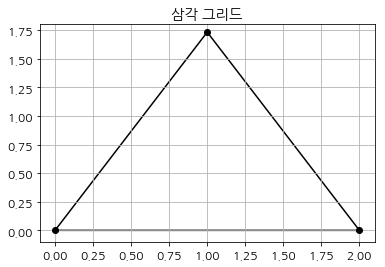

In [6]:
x = np.array([0, 1, 2])
y = np.array([0, np.sqrt(3), 0])
triangles = [[0, 1, 2]]  # 점들은 기하학적 위상 정보 즉, 어떤 삼각형이 있으며 각 삼각형이 어떤 점들로 이루어졌는지를 봄
# 이러한 정보가 주어지지 않으면 자동으로 생성

triang = mtri.Triangulation(x, y, triangles)  # 1. Triangulation 객체 생성 : x, y는 각각 1차원 벡터(x좌표, y좌표를 나타냄)

plt.title("삼각 그리드")
plt.triplot(triang, 'ko-')  
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.grid(True)
plt.show()

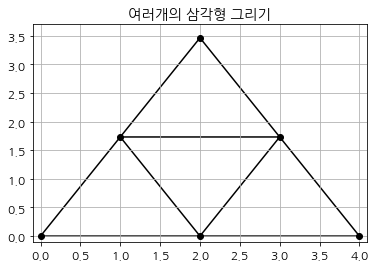

In [13]:
x = np.asarray([0, 1, 2, 3, 4, 2])
y = np.asarray([0, np.sqrt(3), 0, np.sqrt(3), 0, 2*np.sqrt(3)])
triangles = [[0, 1, 2], [2, 3, 4], [1, 2, 3], [1, 3, 5]]
triang = mtri.Triangulation(x, y, triangles)
plt.title("여러개의 삼각형 그리기")
plt.triplot(triang, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.grid()
plt.show()

### 그리드 세분화

그리드를 더 세분화하려면 TriRefiner 또는 UniformTriRefiner를 사용한다. 이 클래스들은 다음과 같은 메서드를 가진다.

+ refine_triangulation : 단순히 삼각 그리드를 세분화

    * http://matplotlib.org/api/tri_api.html#matplotlib.tri.UniformTriRefiner.refine_triangulation
+ refine_field : 실제 함수 값에 대해 최적화된 삼각 그리드 생성

    * http://matplotlib.org/api/tri_api.html#matplotlib.tri.UniformTriRefiner.refine_field

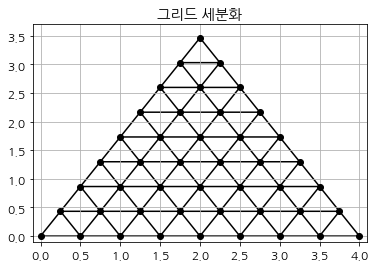

In [15]:
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=2)
plt.title("그리드 세분화")
plt.triplot(triang2, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.grid()
plt.show()

### 그리드 플롯
이렇게 만들어진 그리드상에 tricontour, tricontourf, plot_trisur, plot_trisurf 등의 명령을 사용하여 2차원 등고선(coutour) 플롯이나 3차원 표면(surface) 플롯을 그릴 수 있다.

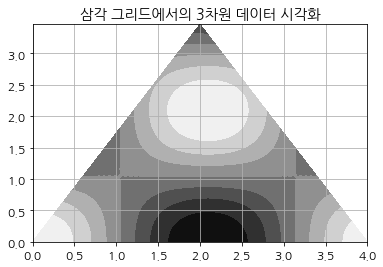

In [16]:
triang5 = refiner.refine_triangulation(subdiv=5)
z5 = np.cos(1.5 * triang5.x) * np.cos(1.5 * triang5.y)
plt.title("삼각 그리드에서의 3차원 데이터 시각화")
plt.tricontourf(triang5, z5, cmap="gray")
plt.grid()
plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D

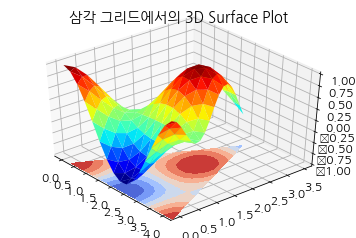

In [18]:
from matplotlib import cm

triang3 = refiner.refine_triangulation(subdiv=3)
z3 = np.cos(1.5 * triang3.x) * np.cos(1.5 * triang3.y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("삼각 그리드에서의 3D Surface Plot")
ax.plot_trisurf(triang3.x, triang3.y, z3, cmap=cm.jet, linewidth=0.2)
ax.tricontourf(triang3, z3, zdir='z', offset=-1.2, cmap=cm.coolwarm)
ax.set_zlim(-1, 1)
ax.view_init(40, -40)
plt.grid()
plt.show()

In [19]:
# np.array와 np.asarray 차이
x = np.array([1, 2, 3])
y = np.array(x, copy=True)
z = np.array(x, copy=False)

In [20]:
z[0] = 11; print(x); print(y); print(z);

y[0] = 22; print(x); print(y); print(z);

[11  2  3]
[1 2 3]
[11  2  3]
[11  2  3]
[22  2  3]
[11  2  3]


http://stackoverflow.com/questions/14415741/numpy-array-vs-asarray 

asarray 함수 내부에서 array 함수를 호출합니다. 따라서 실질적으로 동일함. 다만 array 함수는 몇 가지 추가적인 옵션을 줄 수 있고 그 중 하나가 copy 옵션이다. copy 옵션을 True로 하면 별도의 객체를 만들고 False이면 동일한 객체의 view를 만든다